# The Cognifyz Data Science Internship
## Level 3

### Task1 - Predictive Modeling
### Task2 -Customer Preference Analysis
### Task3 - Data Visualization



### Credits: Saya Vamshi Krishna

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data set

In [16]:
data = pd.read_csv("/Users/vamshikrishna33/Documents/Cognifyz_Technologies_Internship/Dataset.csv") 
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Drop non-numeric columns that cannot be converted or are irrelevant for regression
non_numeric_cols = ['Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Latitude', 'Longitude', 'Currency', 'Rating color', 'Rating text']  # Columns not suitable for regression

data_cleaned = data.drop(non_numeric_cols, axis=1)  # Drop non-numeric columns

# Perform one-hot encoding for remaining categorical columns
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)

# Features and target variable after encoding
X = data_encoded.drop('Aggregate rating', axis=1)  # Features
y = data_encoded['Aggregate rating']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)  # Training the model
    y_pred = model.predict(X_test)  # Predictions
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared: {r2:.4f}\n")

Model: Linear Regression
Mean Absolute Error: 4837065.8065
Mean Squared Error: 694691912723943.7500
R-squared: -307007626115013.7500

Model: Decision Tree
Mean Absolute Error: 0.2568
Mean Squared Error: 0.1624
R-squared: 0.9282

Model: Random Forest
Mean Absolute Error: 0.2028
Mean Squared Error: 0.1001
R-squared: 0.9558



In [18]:
# Group by cuisine and calculate average rating
cuisine_rating = data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print("Average rating for each cuisine:")
print(cuisine_rating)

Average rating for each cuisine:
Cuisines
Italian, Deli                     4.9
Hawaiian, Seafood                 4.9
American, Sandwich, Tea           4.9
Continental, Indian               4.9
European, Asian, Indian           4.9
                                 ... 
Fast Food, Desserts, Beverages    0.0
Fast Food, Chinese, Burger        0.0
Cafe, French                      0.0
Seafood, Mughlai, North Indian    0.0
Fast Food, Mughlai, Armenian      0.0
Name: Aggregate rating, Length: 1825, dtype: float64


In [19]:
# Identify the most popular cuisines based on the number of votes
popular_cuisines = data.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 popular cuisines based on votes:")
print(popular_cuisines)


Top 10 popular cuisines based on votes:
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


In [20]:
# Calculate average ratings for the top cuisines with high votes
top_cuisines = popular_cuisines.index.tolist()  # List of top cuisines
ratings_of_top_cuisines = data[data['Cuisines'].isin(top_cuisines)].groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print("\nAverage rating for top cuisines based on votes:")
print(ratings_of_top_cuisines)


Average rating for top cuisines based on votes:
Cuisines
Italian                           3.657407
Cafe                              2.890970
North Indian, Mughlai             2.888623
North Indian, Mughlai, Chinese    2.568528
North Indian, Chinese             2.421722
South Indian                      2.370536
Fast Food                         2.118362
Mughlai, North Indian             2.091667
Chinese                           2.042090
North Indian                      1.672329
Name: Aggregate rating, dtype: float64


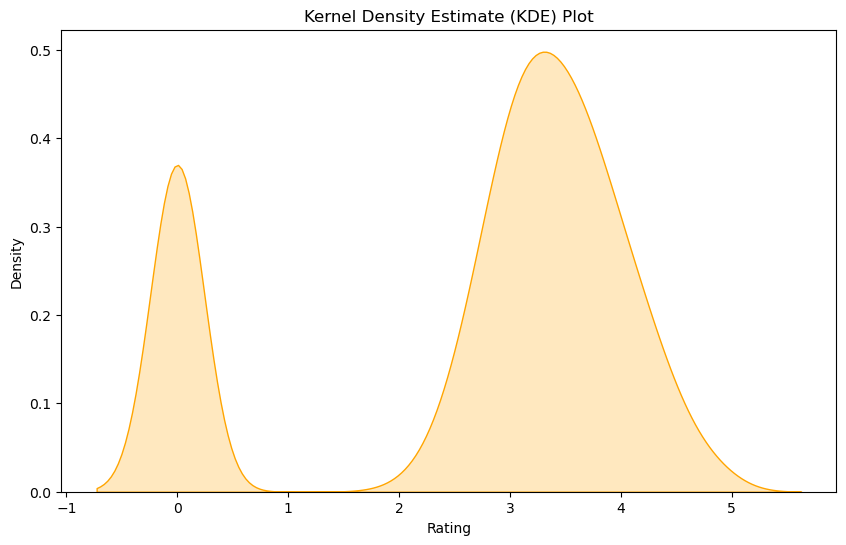

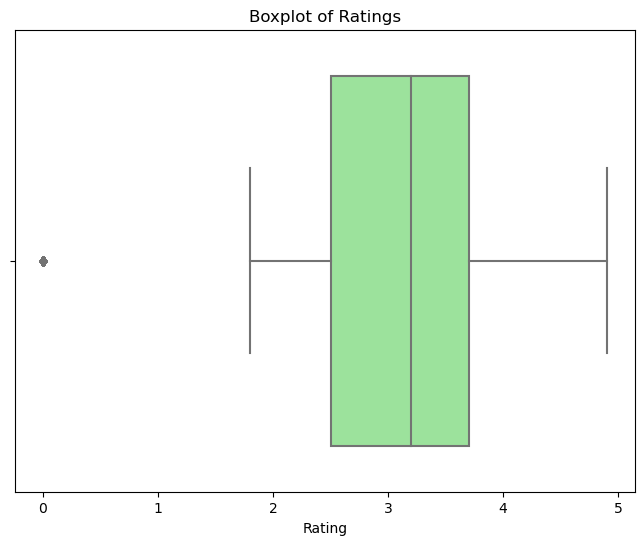

In [24]:


# Kernel Density Estimate (KDE) plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Aggregate rating'], fill=True, color='orange')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE) Plot')
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Aggregate rating'], color='lightgreen')
plt.xlabel('Rating')
plt.title('Boxplot of Ratings')
plt.show()


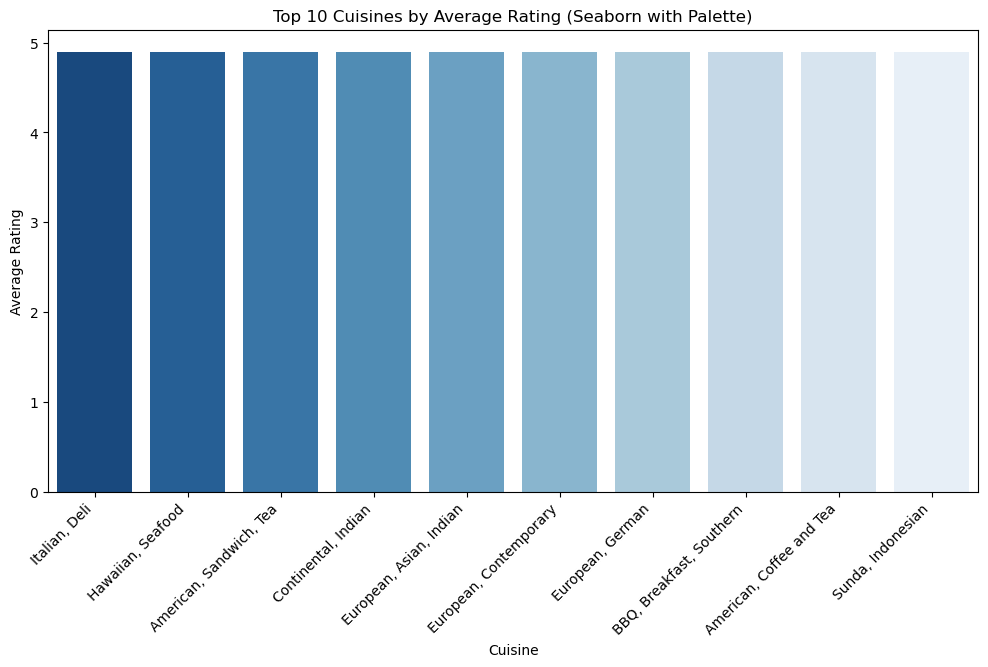

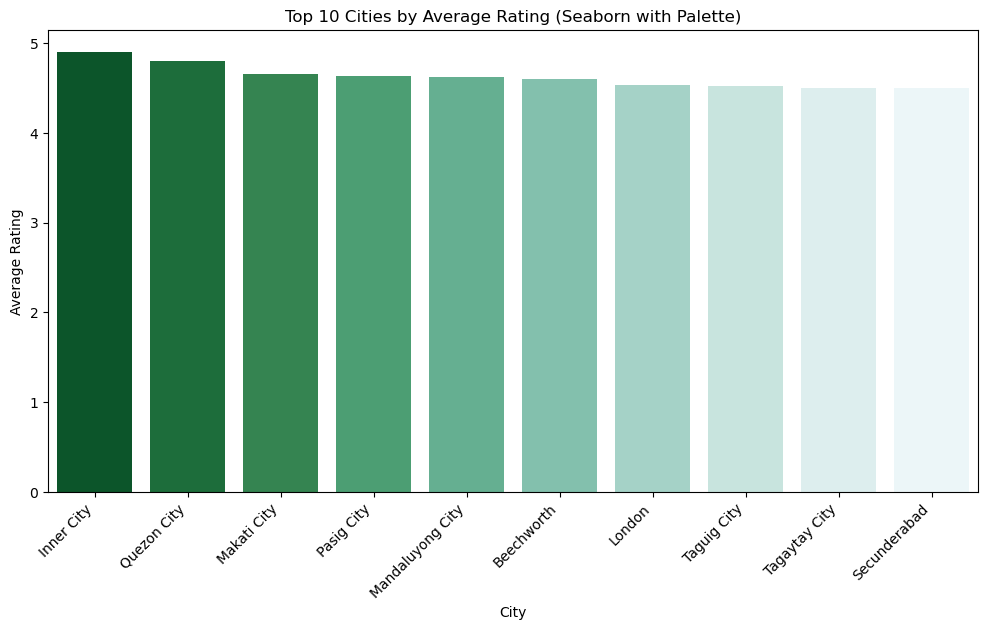

In [29]:


# Bar plot for average ratings of different cuisines using seaborn with palette
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_cuisines.index, y=avg_rating_cuisines, palette='Blues_r')  # You can choose a different palette
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.title('Top 10 Cuisines by Average Rating (Seaborn with Palette)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Bar plot for average ratings of different cities using seaborn with palette
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_cities.index, y=avg_rating_cities, palette='BuGn_r')  # You can choose a different palette
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.title('Top 10 Cities by Average Rating (Seaborn with Palette)')
plt.xticks(rotation=45, ha='right')
plt.show()


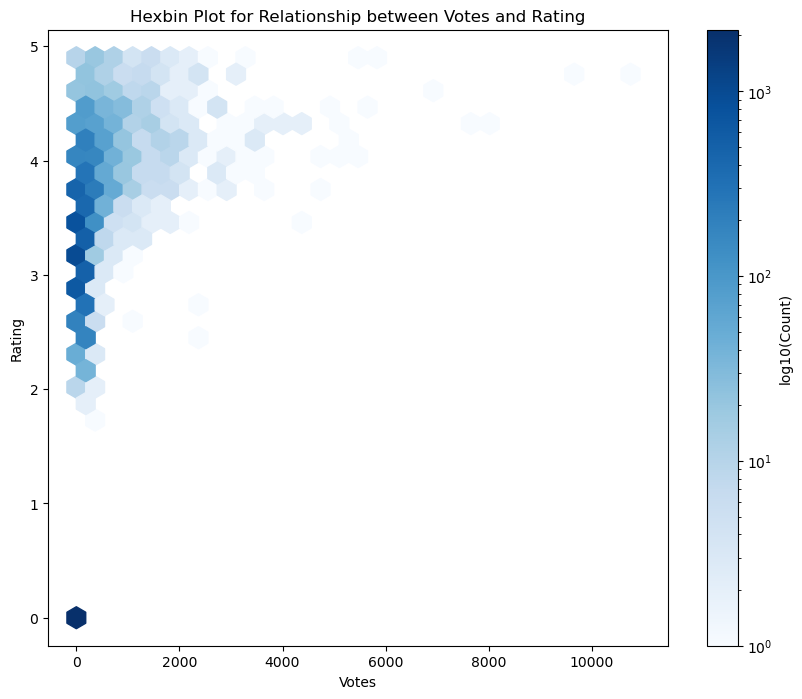

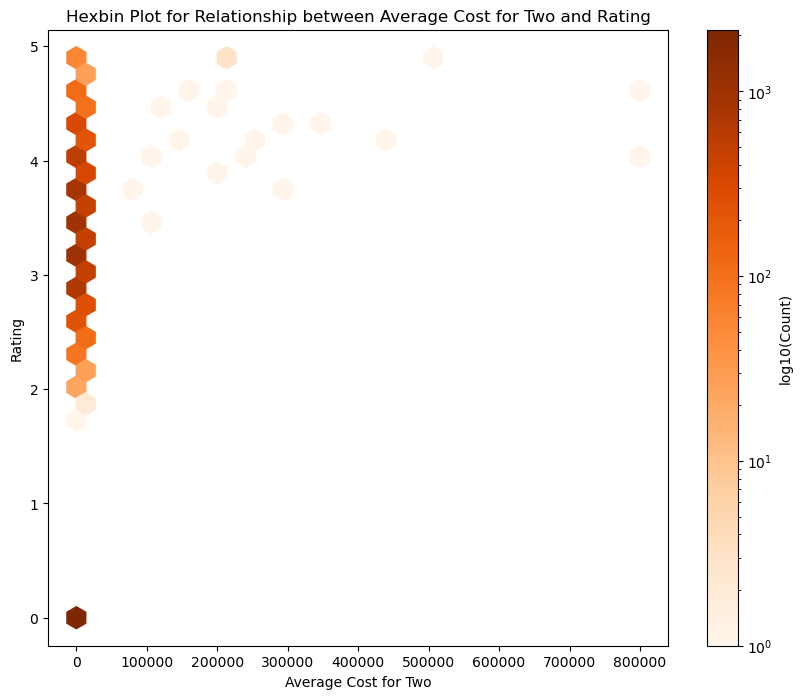

In [32]:
# Hexbin plot for relationship between votes and ratings
plt.figure(figsize=(10, 8))
plt.hexbin(data['Votes'], data['Aggregate rating'], gridsize=30, cmap='Blues', bins='log')
plt.colorbar(label='log10(Count)')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.title('Hexbin Plot for Relationship between Votes and Rating')
plt.show()

# Hexbin plot for relationship between average cost and ratings
plt.figure(figsize=(10, 8))
plt.hexbin(data['Average Cost for two'], data['Aggregate rating'], gridsize=30, cmap='Oranges', bins='log')
plt.colorbar(label='log10(Count)')
plt.xlabel('Average Cost for Two')
plt.ylabel('Rating')
plt.title('Hexbin Plot for Relationship between Average Cost for Two and Rating')
plt.show()
